### Instructor Demo: Probable Outcomes of Stock Price Trajectory

This program executes `1000` simulations of stock price trajectory over the next `252` trading days (or year of trading), based on a normal probability distribution of average daily returns derived from the sample mean and standard deviation.

In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline

### Check Available Tickers from IEX Cloud API

In [3]:
# Return available tickers from API
tickers=pd.DataFrame(get_symbols())
tickers.head()

,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
0,USD,2019-08-24,NYS,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,A,cs
1,USD,2019-08-24,NYS,IEX_4238333734532D52,True,Alcoa Corp.,US,AA,cs
2,USD,2019-08-24,PSE,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,AAAU,et
3,USD,2019-08-24,NAS,IEX_4E5434354A302D52,True,Altaba Inc.,US,AABA,cef
4,USD,2019-08-24,NYS,IEX_4843364642592D52,True,AAC Holdings Inc.,US,AAC,cs


### Get 1 Year's Worth of Data via API Call and Read in as DataFrame 

In [4]:
# Set the ticker
ticker = "AAPL"

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(ticker, start_date, end_date,  output_format='pandas')
df.head()

,open,high,low,close,volume
date,,,,,
2018-08-24,216.60,216.90,215.11,216.16,18476356
2018-08-27,217.15,218.74,216.33,217.94,20525117
2018-08-28,219.01,220.54,218.92,219.70,22776766
2018-08-29,220.15,223.49,219.41,222.98,27254804
2018-08-30,223.25,228.26,222.40,225.03,48793824


### Drop Extraneous Columns

In [5]:
# Use the `drop` function to drop extra columns in the DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
df.head()

,close
date,
2018-08-24,216.16
2018-08-27,217.94
2018-08-28,219.70
2018-08-29,222.98
2018-08-30,225.03


### Calculate Daily Returns

In [6]:
# Use the `pct_change` function to calculate daily returns of AAPL
daily_returns = df.pct_change()
daily_returns.head()

,close
date,
2018-08-24,NaN
2018-08-27,0.008235
2018-08-28,0.008076
2018-08-29,0.014929
2018-08-30,0.009194


### Calculate Value of Average Daily Returns

In [7]:
# Use the `mean` function to calculate the mean of daily returns for AAPL
avg_daily_return = daily_returns.mean()['close']
avg_daily_return

-5.227659614605251e-05

### Calculate Value of Standard Deviation of Daily Returns

In [8]:
# Use the `std` function to calculate the standard deviation of daily returns for AAPL
std_dev_daily_return = daily_returns.std()['close']
std_dev_daily_return

0.020253118741950342

### Run the Monte Carlo Simulation and Save Results to DataFrame

In [9]:
# Set number of simulations, trading days, and get last closing price of AAPL from DataFrame
num_simulations = 1000
num_trading_days = 252
aapl_last_price = df['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of AAPL
    simulated_aapl_prices = [aapl_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_aapl_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        # Append the simulated price to the list
        simulated_aapl_prices.append(simulated_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_aapl_prices)

# Print head of DataFrame
simulated_price_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,...,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000,202.640000
1,202.702766,203.788917,200.558154,200.851721,203.663133,200.863707,195.881149,192.921095,207.078356,200.714770,...,205.937535,205.372765,204.417990,204.128713,210.279006,206.715611,204.702159,201.343568,199.890196,204.280619
2,199.940842,199.075469,195.735693,196.003792,200.401648,203.657629,193.939589,188.020780,205.308988,203.189073,...,202.946100,204.118861,204.340067,206.327206,210.927746,207.585539,206.007214,203.438454,197.842080,213.961361
3,197.568956,195.224910,197.166615,197.772947,198.754133,206.221029,198.309440,183.489459,200.231233,205.633330,...,201.033846,207.896252,208.549302,214.431773,206.362166,207.077812,201.404521,199.462499,203.062141,215.572274
4,202.880056,194.097953,201.068742,194.537683,204.403388,204.588282,193.359829,181.974005,204.299363,207.158708,...,202.752034,204.853695,219.954343,212.695382,202.296637,211.749478,199.877574,199.183525,205.631514,211.314258


### Plot the Multiple Simulations of Stock Price Trajectory for AAPL over the Next Year (252 Trading Days)

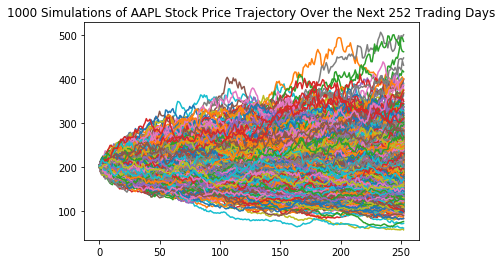

In [10]:
# Use the `plot` function to plot the trajectory of AAPL stock based on a 252 trading day simulation
plot_title = f"{n+1} Simulations of AAPL Stock Price Trajectory Over the Next 252 Trading Days"
simulated_price_df.plot(legend=None, title=plot_title)

In [11]:
# Select the last row for project stock prices (prices of each simulation on the 252nd trading day)
simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.head()

Simulation 1    192.461789
Simulation 2    303.278950
Simulation 3    140.746865
Simulation 4    138.771179
Simulation 5    254.334215
Name: 252, dtype: float64

### Plot the Frequency Distribution of Simulated Ending Prices on 252nd Trading Day

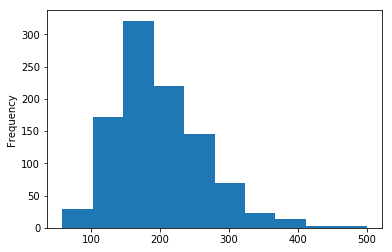

In [12]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
simulated_ending_prices.plot(kind='hist')

### Calculate Lower and Upper Bounds of 95% Confidence Interval for Simulated Ending Stock Prices of AAPL

In [13]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices.quantile(q=[0.025, 0.975])
confidence_interval

0.025    101.024596
0.975    349.138384
Name: 252, dtype: float64

### Plot the Probability Distribution and 95% Confidence Interval of Simulated Ending Prices 

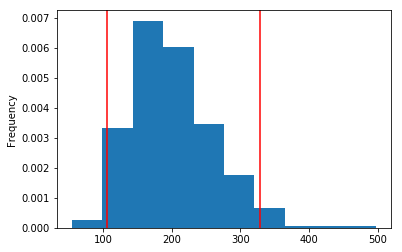

In [13]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
plt.figure();
simulated_ending_prices.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

### Calculate 95% Confidence Interval of An Initial Investment of 10,000 in AAPL over the Next 252 Trading Days

In [14]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - aapl_last_price) / aapl_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - aapl_last_price) / aapl_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in AAPL"
      f" over the next 252 trading days will end within in the range of"
      f" ${ending_investment_lower_bound} and ${ending_investment_upper_bound}")

There is a 95% chance that an initial investment of $10,000 in AAPL over the next 252 trading days will end within in the range of $4985.422219695815 and $17229.489936910526
